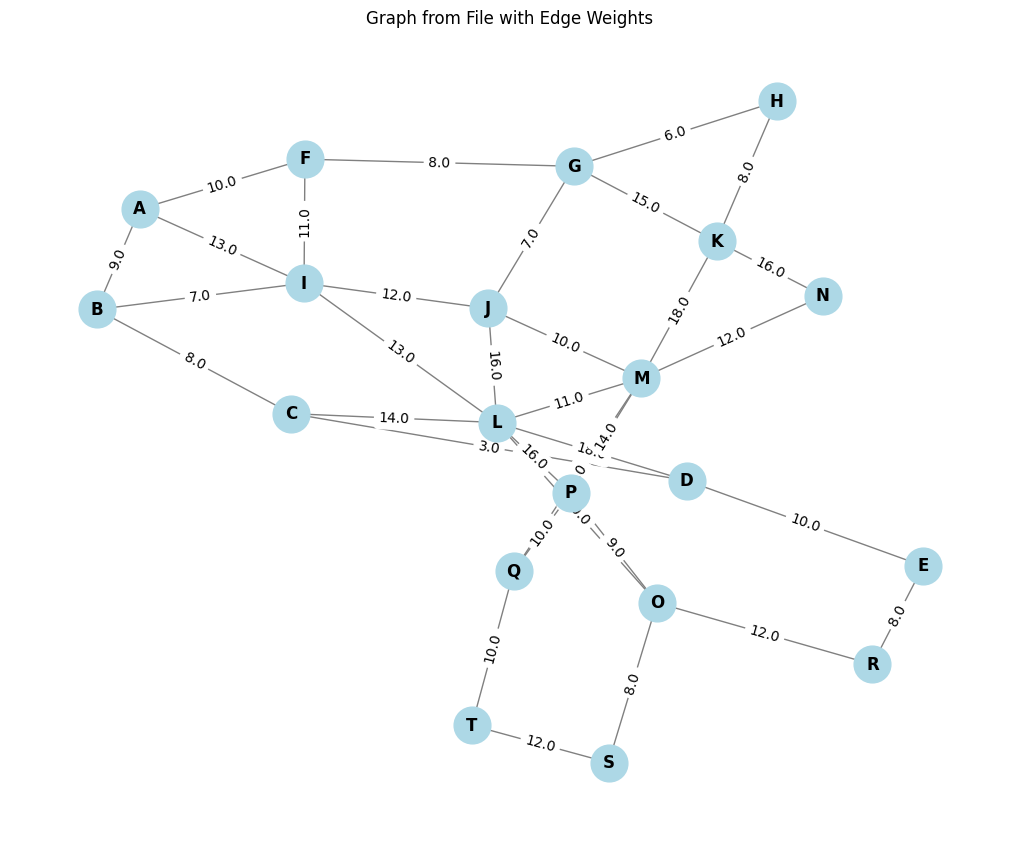

In [4]:
# Exibe o grafo do arquivo graph.txt
from functions import visualizar_grafo
visualizar_grafo("grafo.txt")

In [1]:
from functions import *
np.set_printoptions(threshold=np.inf)

# Utiliza ordem alfabetica para descoberta dos nós
def dijkstra(inicial, final, matriz_adj):
    descobertos = []
    # Conjunto de vertices que não foram explorados
    abertos = []
    distancia = dict()
    pais = dict()

    # Adiciona todos os vertices no conjunto de abertos
    for vertice in range(len(matriz_adj)):
        if conexo_ao_grafo(vertice, matriz_adj):
            abertos.append(vertice)
            distancia[vertice] = np.inf
    if len(matriz_adj) != len(abertos):
        print("O grafo possui vértices desconexos")

    # Descobre o vertice inicial e zera sua distancia
    descobertos.append(inicial)
    distancia[inicial] = 0

    if inicial+1 > len(matriz_adj) or final+1 > len(matriz_adj):
        print("Vertice inicial ou final não existe no grafo")
        return []
    while len(abertos) != 0:
        # print("Abertos: ", list(map(int_to_letter, list(map(lambda x: x+1, abertos)))))
        # print("Distancias: ", [f"{int_to_letter(i+1)}: {distancia[i]}" for i in distancia if i in abertos])
        v = abertos.pop(obter_indice_menor_distancia(abertos, distancia))
        # print("Escolhido: ", int_to_letter(v+1))
        # Obtém os vizinhos do vertice v
        vizinhos = [i for i in obter_vizinhos(v, matriz_adj) if i in abertos]
        # print("Vizinhos :", list(map(int_to_letter, list(map(lambda x: x+1, vizinhos)))))

        for vizinho in vizinhos:
            # Descobre cada vizinho e os adiciona na fila para serem explorados
            descobertos.append(vizinho)
            if distancia[v] + matriz_adj[v][vizinho] < distancia[vizinho]:
                distancia[vizinho] = distancia[v] + matriz_adj[v][vizinho]
                pais[vizinho] = v
        # print("Descobertos: ", list(map(int_to_letter, list(map(lambda x: x+1, descobertos[::-1])))))
    # print(f"Distância da Solução: {distancia[final-1]}")
    return descobertos, pais

matriz_adj = gerar_matriz_adjacente("grafo.txt")
inicial, final = letter_to_int("G")-1, letter_to_int("S")-1 # Retorna o número correspondente a ordem alfabética

descobertos, pais = dijkstra(inicial, final, matriz_adj)

imprimir_resultado(incrementar(descobertos), usarLetras=True)

Descobertos:  ['G', 'F', 'H', 'J', 'K', 'K', 'I', 'L', 'M', 'A', 'I', 'M', 'N', 'L', 'N', 'P', 'Q', 'B', 'I', 'B', 'L', 'C', 'D', 'O', 'P', 'C', 'P', 'T', 'O', 'R', 'S', 'D', 'S', 'E', 'E']


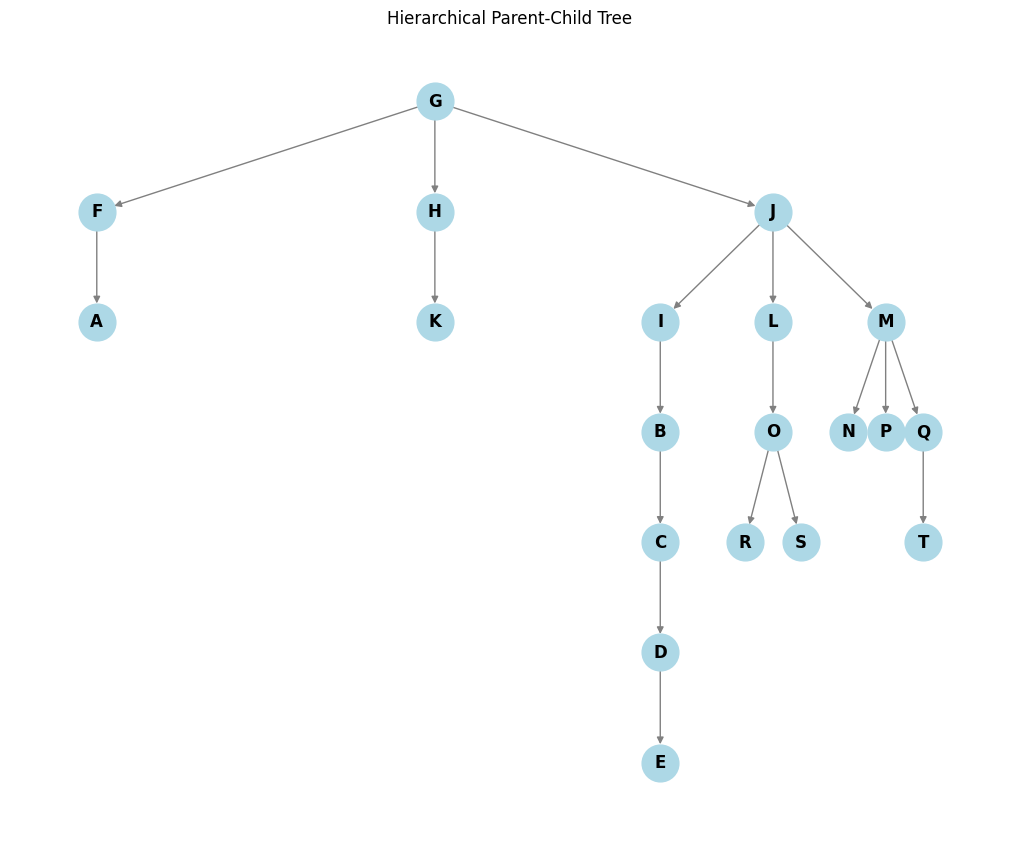

In [2]:
visualizar_arvore_de_pais(incrementar(pais), usarLetras=True)